# Python example for Climatic Research Unit (CRU) time-series (TS) data

## CRU TS data

The following guide will assist with the visualisation of the Climatic Research Unit (CRU) gridded time-series (TS) dataset. For more information on this data, or to understand the ways in which it can be downloaded, please see the CEDA CRU data user guide.

In [4]:
PACKAGE = 'import_ipynb'

In [5]:
# Import the required packages
import virtualenv
import pip
import os
import pydoc

# Define and create the base directory install virtual environments
venvs_dir = os.path.join(os.path.expanduser("~"), "nb-venvs")

# Create base venvs directory if not already there
if not os.path.isdir(venvs_dir):
    os.makedirs(venvs_dir)

# Define the venv directory
venv_dir = os.path.join(venvs_dir, 'venv-notebook')

if not os.path.isdir(venv_dir):
    # Create the virtual environment
    print(f'[INFO] Creating: virtual env at: {venv_dir}')
    virtualenv.create_environment(venv_dir)
    
# Activate the venv
activate_file = os.path.join(venv_dir, "bin", "activate_this.py")
exec(open(activate_file).read(), dict(__file__=activate_file))

# Try to import the package, if it fails, then try to pip install it,
# and import again

# NOTE: We use `__import__` instead of `import` so that PACKAGE can 
# be a string value, and can therefore be replaced at the top of the 
# Notebook with your package of choice.
try:
    __import__(PACKAGE)
except Exception as exc:
    # pip install a package using the venv as a prefix
    print(f'[INFO] Pip installing "{PACKAGE}"')
    pip.main(["install", "--prefix", venv_dir, PACKAGE])
    __import__(PACKAGE)

print(f'[INFO] "{PACKAGE} has been imported.')
print(pydoc.locate(PACKAGE))

print(f'NOTE: You can now work with the package "{PACKAGE}" as usual...')

[INFO] "import_ipynb has been imported.
<module 'import_ipynb' from '/home/users/eggleton/.local/lib/python3.7/site-packages/import_ipynb.py'>
NOTE: You can now work with the package "import_ipynb" as usual...


The code below is put at the beginning of the script to add the specific packages (tools) that are needed in python to achieve the outcome

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import numpy as np
import import_ipynb
import cru_data_manipulation

### Plot 1 - Global Map

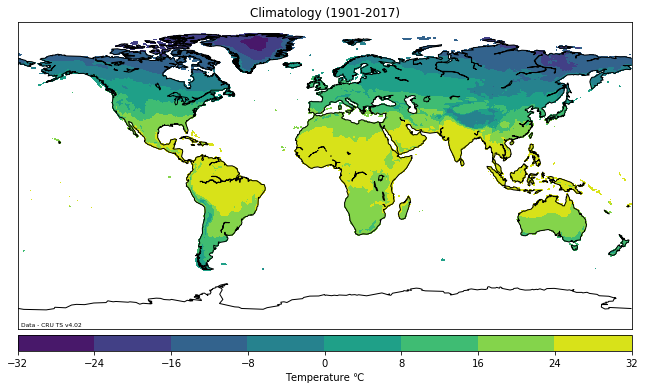

<Figure size 432x288 with 0 Axes>

In [12]:
plot1=plt.figure(figsize=(11,8))

map = Basemap(projection="cyl", resolution='c', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180) 
map.drawcoastlines(color="black") 

lons,lats = np.meshgrid(cru_data_manipulation.lon, cru_data_manipulation.lat) 
x,y = map(lons, lats)

temp_plot = map.contourf(x, y, cru_data_manipulation.temp_av_1901_2017, cmap=plt.cm.viridis) 
cb = map.colorbar(temp_plot, "bottom", size="5%", pad="2%", extend = 'both')
cb.set_label(u"Temperature \u2103")

plt.title("Climatology (1901-2017)")
plt.annotate('Data - CRU TS v4.02',(-178,-88), fontsize=6)
plt.show() 
plt.savefig("cruts_global_climatology.png")

### Plot 2 - Global Map using Cartopy

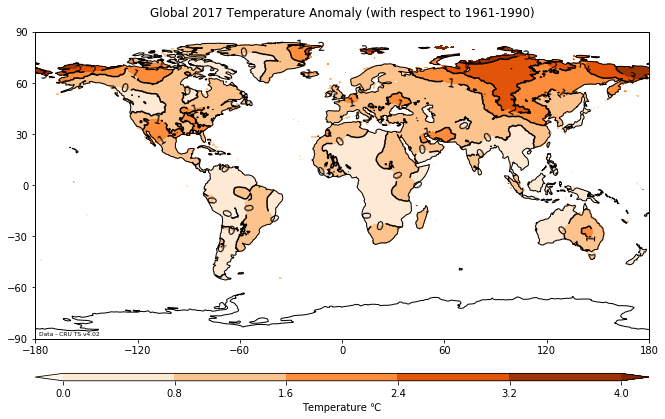

<Figure size 432x288 with 0 Axes>

In [13]:
plot_2=plt.figure(figsize=(11,8)) 

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()

cs = ax.contourf(cru_data_manipulation.lon, cru_data_manipulation.lat, cru_data_manipulation.temp_2017_anom,extend='both', transform=ccrs.PlateCarree(), cmap='Oranges')
cb_2 = plt.colorbar(cs, orientation='horizontal', aspect=75, pad=0.08)
cb_2.set_label(u"Temperature \u2103")
cs = ax.contour(cru_data_manipulation.lon, cru_data_manipulation.lat, cru_data_manipulation.temp_2017_anom, colors='k', linestyles='solid', transform=ccrs.PlateCarree())
plt.clabel(cs, fmt = '%d', colors = 'k', fontsize=12) 

ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 91, 30))

title = plt.title('Global 2017 Temperature Anomaly (with respect to 1961-1990)', y=1.03)
plt.annotate('Data - CRU TS v4.02',(-178,-88), fontsize=6)
plt.show()
plt.savefig("cruts_global_2017_anom.png")

### Plot 3 - Regional Map with Cartopy

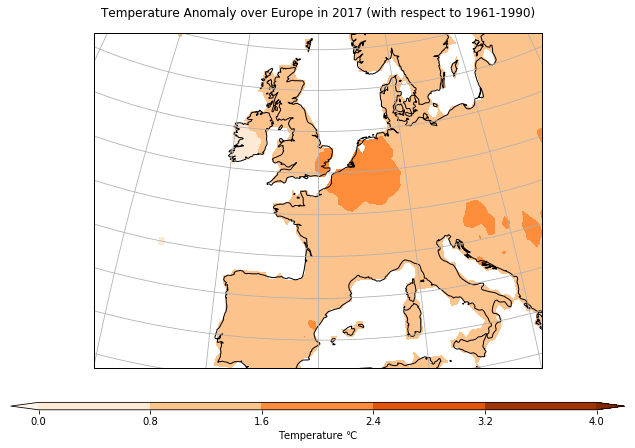

<Figure size 432x288 with 0 Axes>

In [14]:
plot_3=plt.figure(figsize=(11,8))

central_lon, central_lat = 0, 45
extent = [-20, 20, 35, 60]
ax2 = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax2.set_extent(extent)
ax2.gridlines()
ax2.coastlines(resolution='50m')

data_fill = ax2.contourf(cru_data_manipulation.lon, cru_data_manipulation.lat, cru_data_manipulation.temp_2017_anom,extend='both',transform=ccrs.PlateCarree(), cmap='Oranges')
cbar = plt.colorbar(data_fill, orientation='horizontal', aspect=75, pad=0.08)
cbar.set_label(u"Temperature \u2103")

t = plt.title('Temperature Anomaly over Europe in 2017 (with respect to 1961-1990)', y=1.03)
plt.show()
plt.savefig("cruts_eu_2017_anom.png")

### Plot 4 - Timeseries

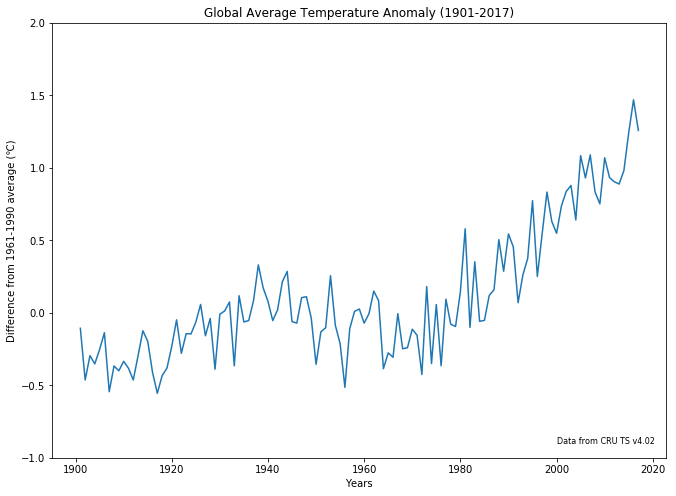

<Figure size 432x288 with 0 Axes>

In [15]:
plot_4 = plt.figure(figsize=(11,8))

years = np.arange(1901,2018,1)
plt.plot(years,cru_data_manipulation.temp_anomaly)
plt.ylim(np.floor(min(cru_data_manipulation.temp_anomaly)), np.ceil(max(cru_data_manipulation.temp_anomaly))) 

plt.title("Global Average Temperature Anomaly (1901-2017)")
plt.xlabel("Years") 
plt.ylabel(u"Difference from 1961-1990 average (\u2103)") 

plt.text(2000, -0.9, "Data from CRU TS v4.02", fontsize=8)
plt.show()
plt.savefig('temp_anom_ts.png')